# Import the Libraries

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving and loading the encoder

from sklearn.model_selection import cross_val_score, KFold
# Visualization
from seaborn import barplot


# Load the CSV file

In [2]:
#Load CSV file
ipl = pd.read_csv('ipl_data.csv')

# EDA Process

In [3]:
#Print the first five rows of the datset
ipl.head(5)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,4/18/2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#Checking Shape
ipl.shape

(76014, 15)

In [5]:
#Check data type
ipl.info

<bound method DataFrame.info of        mid       date                                      venue  \
0        1  4/18/2008                      M Chinnaswamy Stadium   
1        1  4/18/2008                      M Chinnaswamy Stadium   
2        1  4/18/2008                      M Chinnaswamy Stadium   
3        1  4/18/2008                      M Chinnaswamy Stadium   
4        1  4/18/2008                      M Chinnaswamy Stadium   
...    ...        ...                                        ...   
76009  617  5/21/2017  Rajiv Gandhi International Stadium, Uppal   
76010  617  5/21/2017  Rajiv Gandhi International Stadium, Uppal   
76011  617  5/21/2017  Rajiv Gandhi International Stadium, Uppal   
76012  617  5/21/2017  Rajiv Gandhi International Stadium, Uppal   
76013  617  5/21/2017  Rajiv Gandhi International Stadium, Uppal   

                    bat_team                    bowl_team      batsman  \
0      Kolkata Knight Riders  Royal Challengers Bangalore   SC Ganguly   
1  

In [6]:
#Check null values
ipl.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

since there is no empty value, we will proceed forward

In [7]:
#Check summary stats
ipl.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [8]:
#Removing unwanted cols - reduce memory size
irrelevant = ['batsman', 'bowler' , 'date', 'mid', 'striker', 'non-striker']
print(f'Before Removing Irrelevant Columns : {ipl.shape}')
new_ipl = ipl.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {ipl.shape}')
new_ipl.head()

Before Removing Irrelevant Columns : (76014, 15)
After Removing Irrelevant Columns : (76014, 15)


,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
# Filter out only numeric columns
numeric_columns = new_ipl.select_dtypes(include=['number']).columns
# Calculate skewness for numeric columns
skewness = new_ipl[numeric_columns].skew()
# Display skewness values
print(skewness)

runs              0.394403
wickets           0.791621
overs             0.009904
runs_last_5      -0.083089
wickets_last_5    0.901117
total            -0.060268
dtype: float64


# Detecting outliers and Handling them

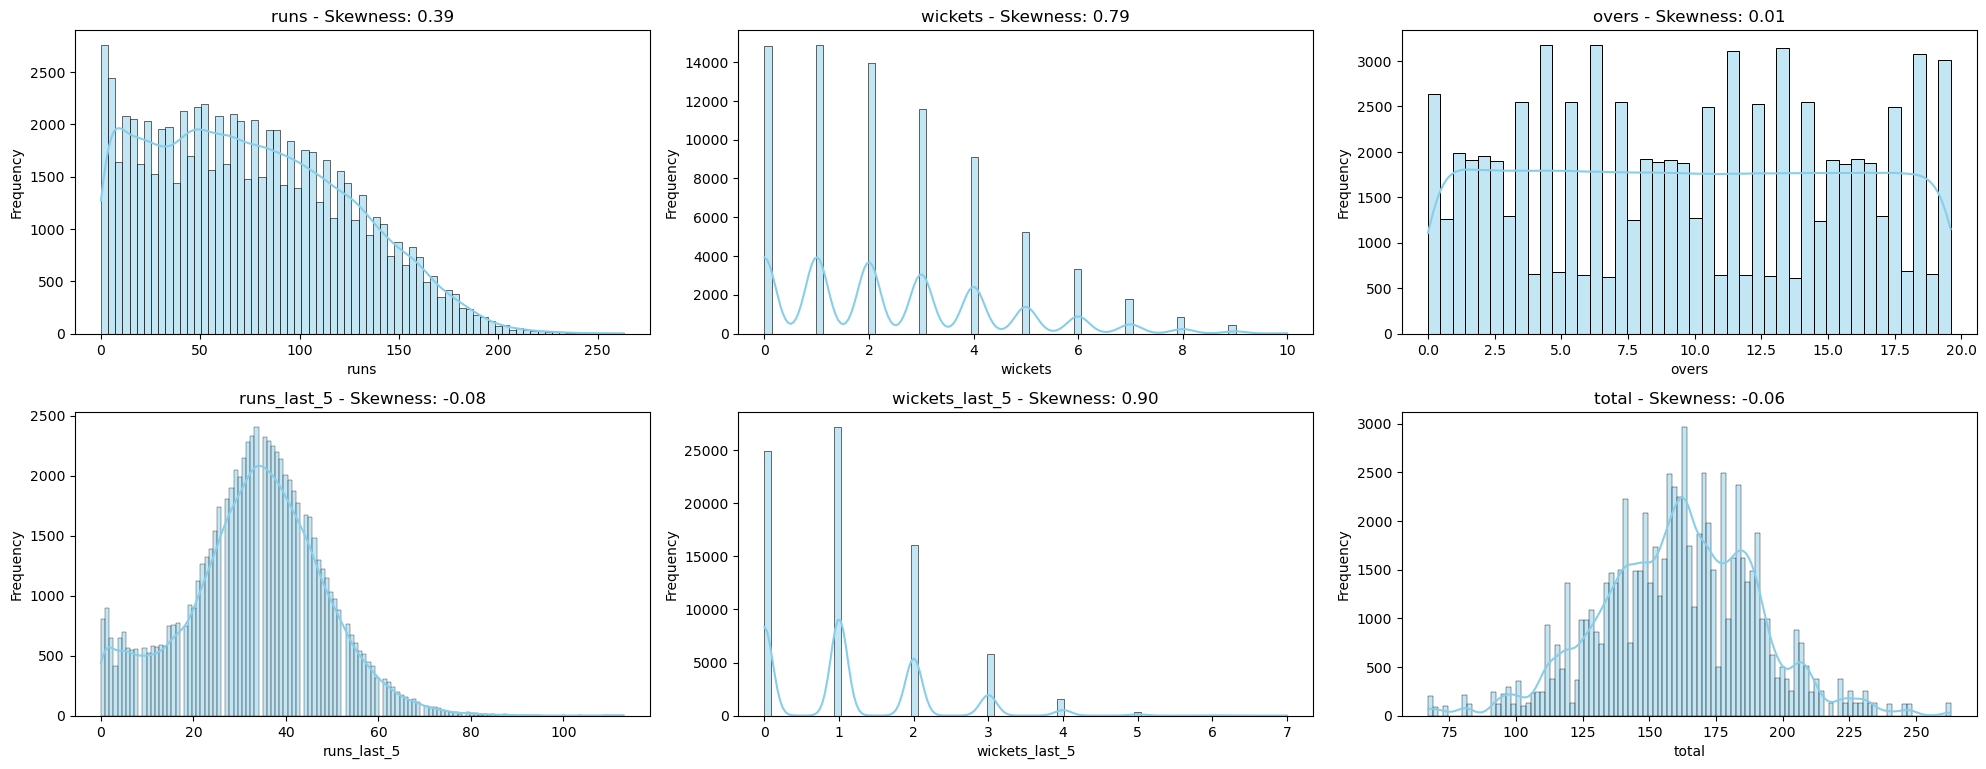

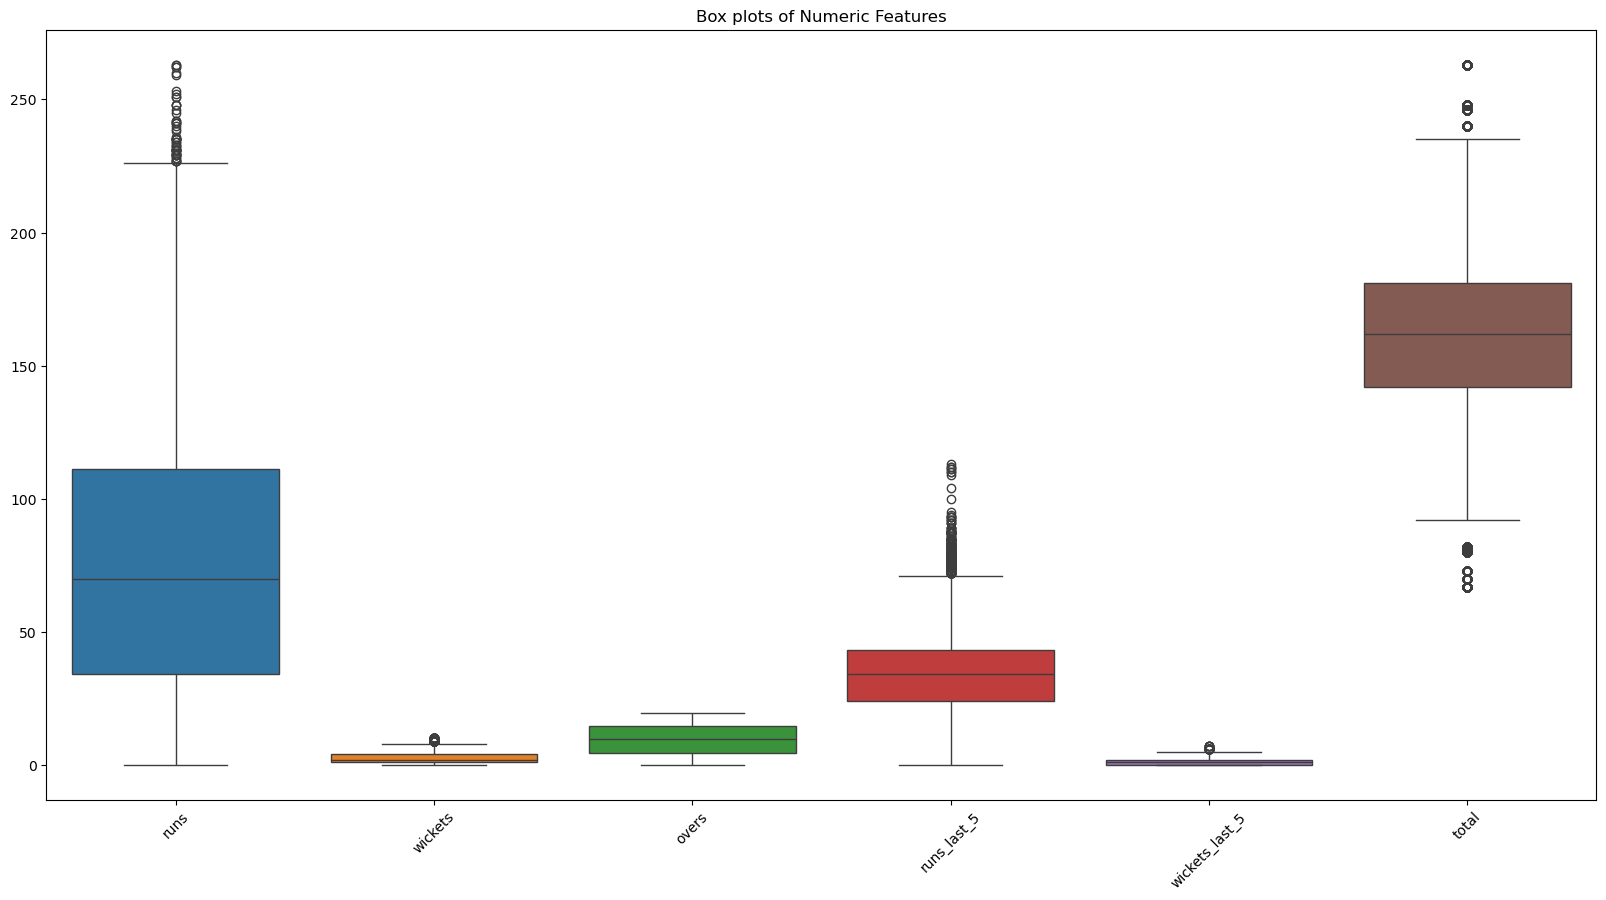

In [10]:
# Filter out only numeric columns
numeric_columns = new_ipl.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Plot histograms with KDE and Box plots for each numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)  # Arrange plots in a 4x3 grid
    sns.histplot(new_ipl[column], kde=True, color='skyblue')
    plt.title(f'{column} - Skewness: {new_ipl[column].skew():.2f}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
# Show the histograms
plt.tight_layout()
plt.show()

# Plot box plots to visually check for outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=new_ipl[numeric_columns])
plt.title('Box plots of Numeric Features')
plt.xticks(rotation=45)
plt.show()


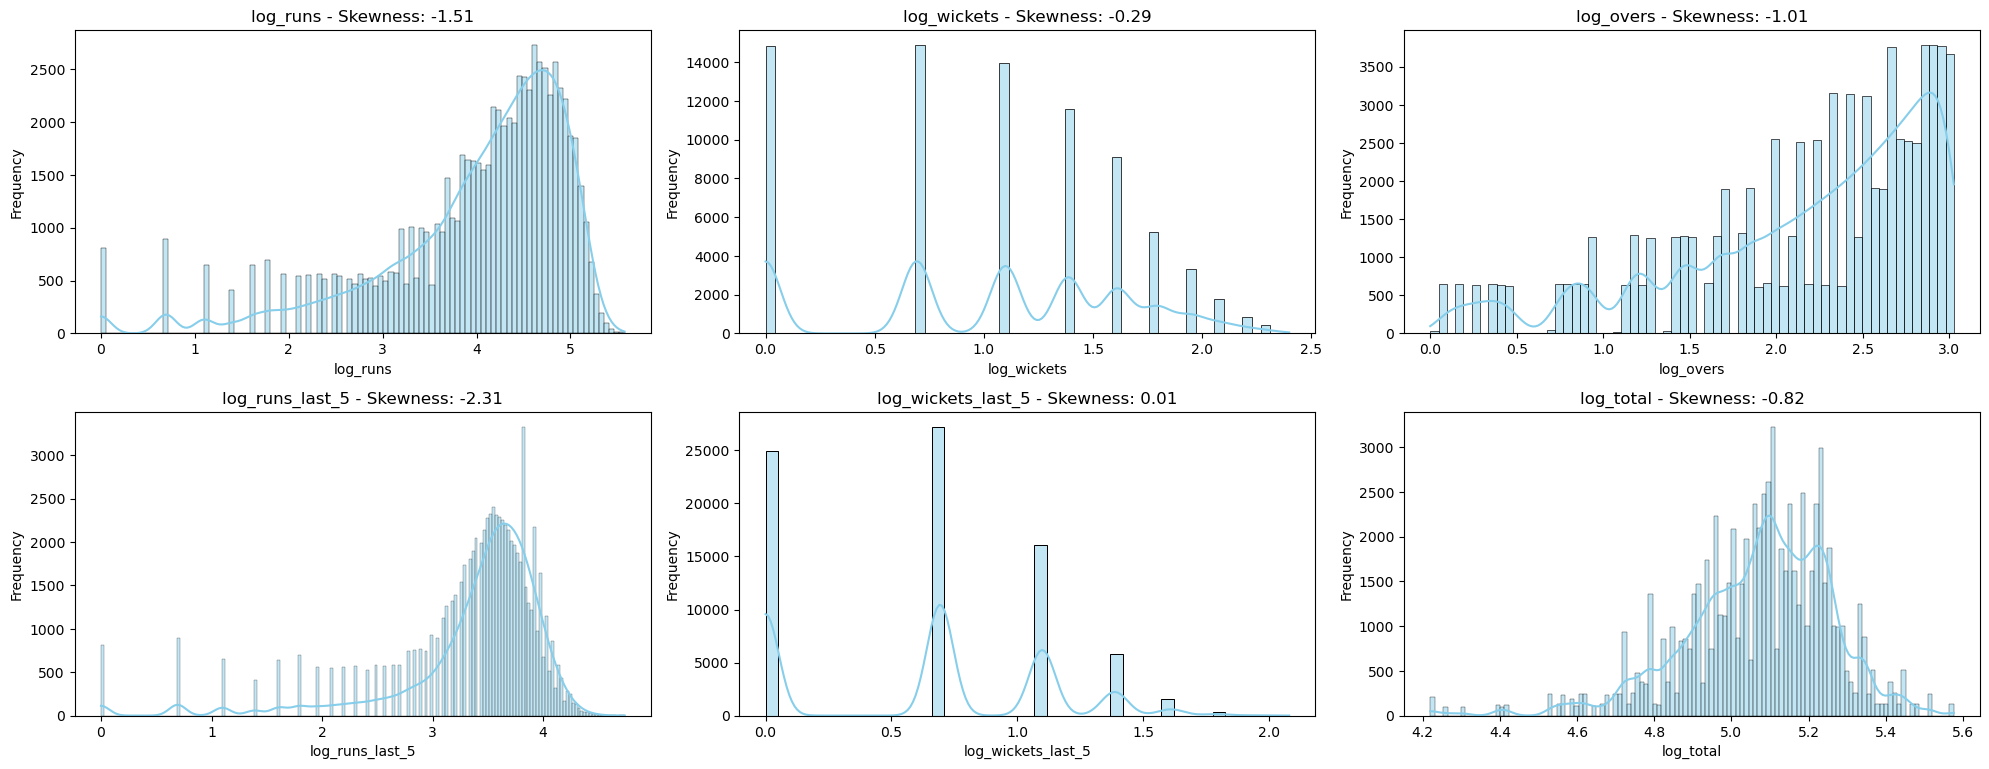

In [11]:
# Apply log transformation to numeric columns
for column in numeric_columns:
    new_ipl[f'log_{column}'] = np.log1p(new_ipl[column])

# Plot histograms with KDE and Box plots for log-transformed columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(new_ipl[f'log_{column}'], kde=True, color='skyblue')
    plt.title(f'log_{column} - Skewness: {new_ipl[f"log_{column}"].skew():.2f}')
    plt.xlabel(f'log_{column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
new_ipl.head(5)

,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,log_runs,log_wickets,log_overs,log_runs_last_5,log_wickets_last_5,log_total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222,0.693147,0.0,0.095310,0.693147,0.0,5.407172
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222,0.693147,0.0,0.182322,0.693147,0.0,5.407172
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222,1.098612,0.0,0.182322,1.098612,0.0,5.407172
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222,1.098612,0.0,0.262364,1.098612,0.0,5.407172
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222,1.098612,0.0,0.336472,1.098612,0.0,5.407172


Teams that never changes even current season

In [13]:
# Define Consistent Teams
const_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
              'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
              'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
print(f'Before Removing Inconsistent Teams : {new_ipl.shape}')
data = new_ipl[(new_ipl['bat_team'].isin(const_teams)) & (new_ipl['bowl_team'].isin(const_teams))]
print(f'After Removing Irrelevant Columns : {new_ipl.shape}')
print(f"Consistent Teams : \n{new_ipl['bat_team'].unique()}")
data.head()

Before Removing Inconsistent Teams : (76014, 15)
After Removing Irrelevant Columns : (76014, 15)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions' 'Rising Pune Supergiant']


,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,log_runs,log_wickets,log_overs,log_runs_last_5,log_wickets_last_5,log_total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222,0.693147,0.0,0.095310,0.693147,0.0,5.407172
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222,0.693147,0.0,0.182322,0.693147,0.0,5.407172
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222,1.098612,0.0,0.182322,1.098612,0.0,5.407172
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222,1.098612,0.0,0.262364,1.098612,0.0,5.407172
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222,1.098612,0.0,0.336472,1.098612,0.0,5.407172


In [15]:
# Ensure remaining columns are numeric
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_columns)

['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total', 'log_runs', 'log_wickets', 'log_overs', 'log_runs_last_5', 'log_wickets_last_5', 'log_total']


In [16]:
# Split the dataframe into independent variable (X) and dependent variable (y)
X = data.drop(['total'], axis=1)
y = data['total']

This plot will give insights into which venues tend to have higher or lower scoring games.

C:\Users\akhta\AppData\Local\Temp\ipykernel_21968\3757106193.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='venue', y='runs', data=data, palette="Set2")


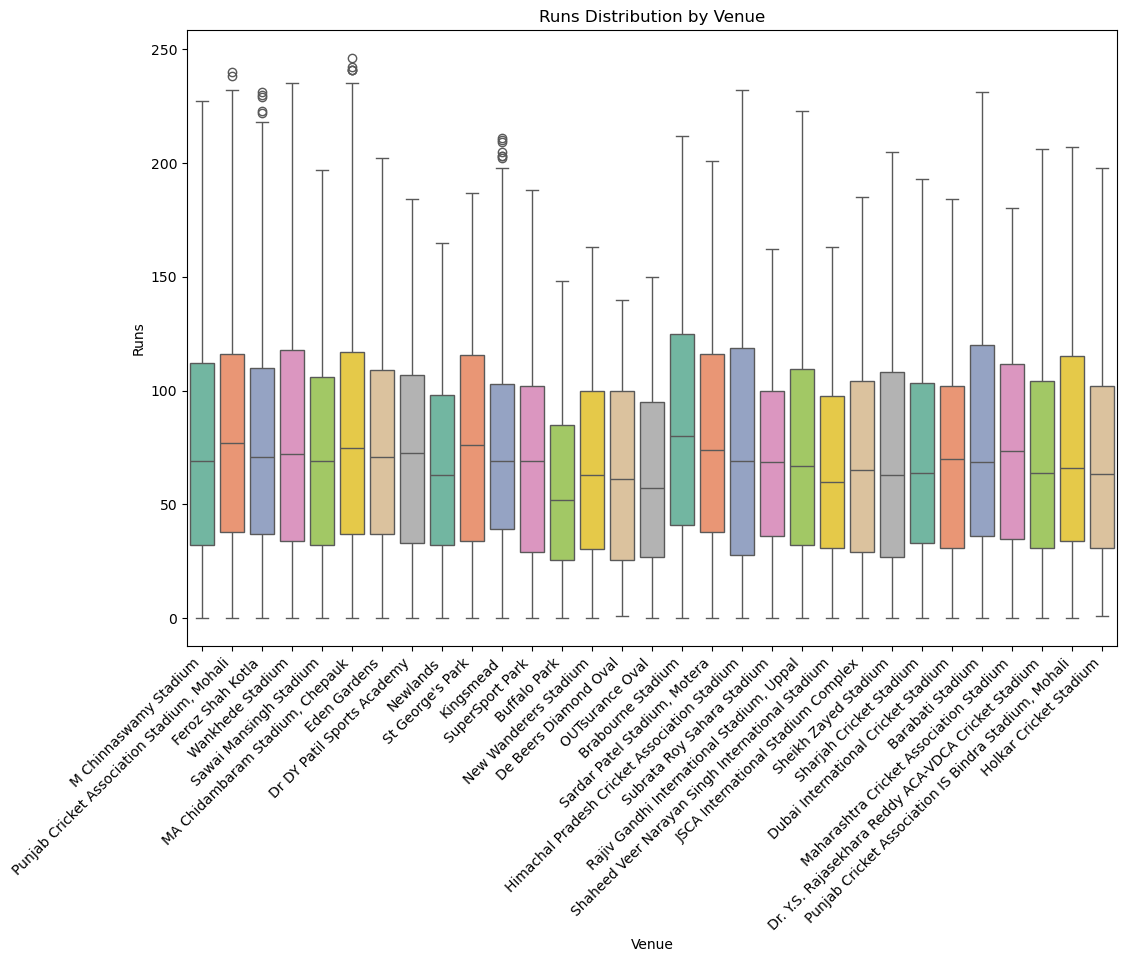

In [17]:
# Average Runs by Venue
plt.figure(figsize=(12, 8))
sns.boxplot(x='venue', y='runs', data=data, palette="Set2")
plt.title('Runs Distribution by Venue')
plt.xlabel('Venue')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')
plt.show()

A heatmap can be used to visually analyze the correlation between numeric features such as runs, wickets, overs, etc.

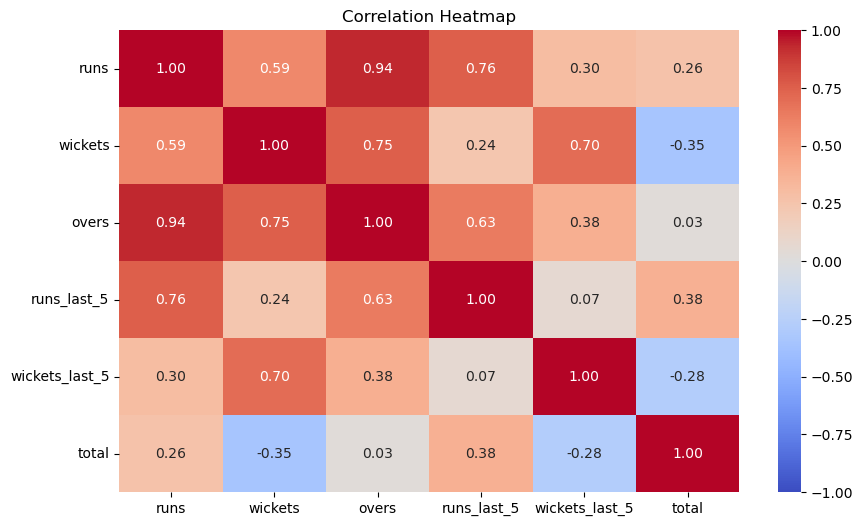

In [18]:
# Correlation Heatmap
corr = data[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Text(0, 0.5, 'Count')

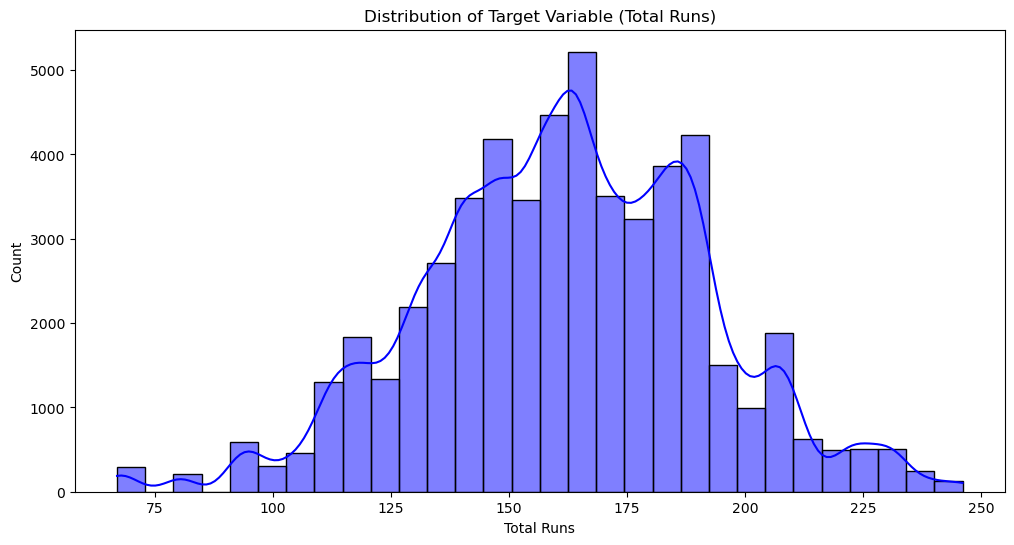

In [19]:
# Distribution Plots
plt.figure(figsize=(12, 6))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Distribution of Target Variable (Total Runs)')
plt.xlabel('Total Runs')
plt.ylabel('Count')

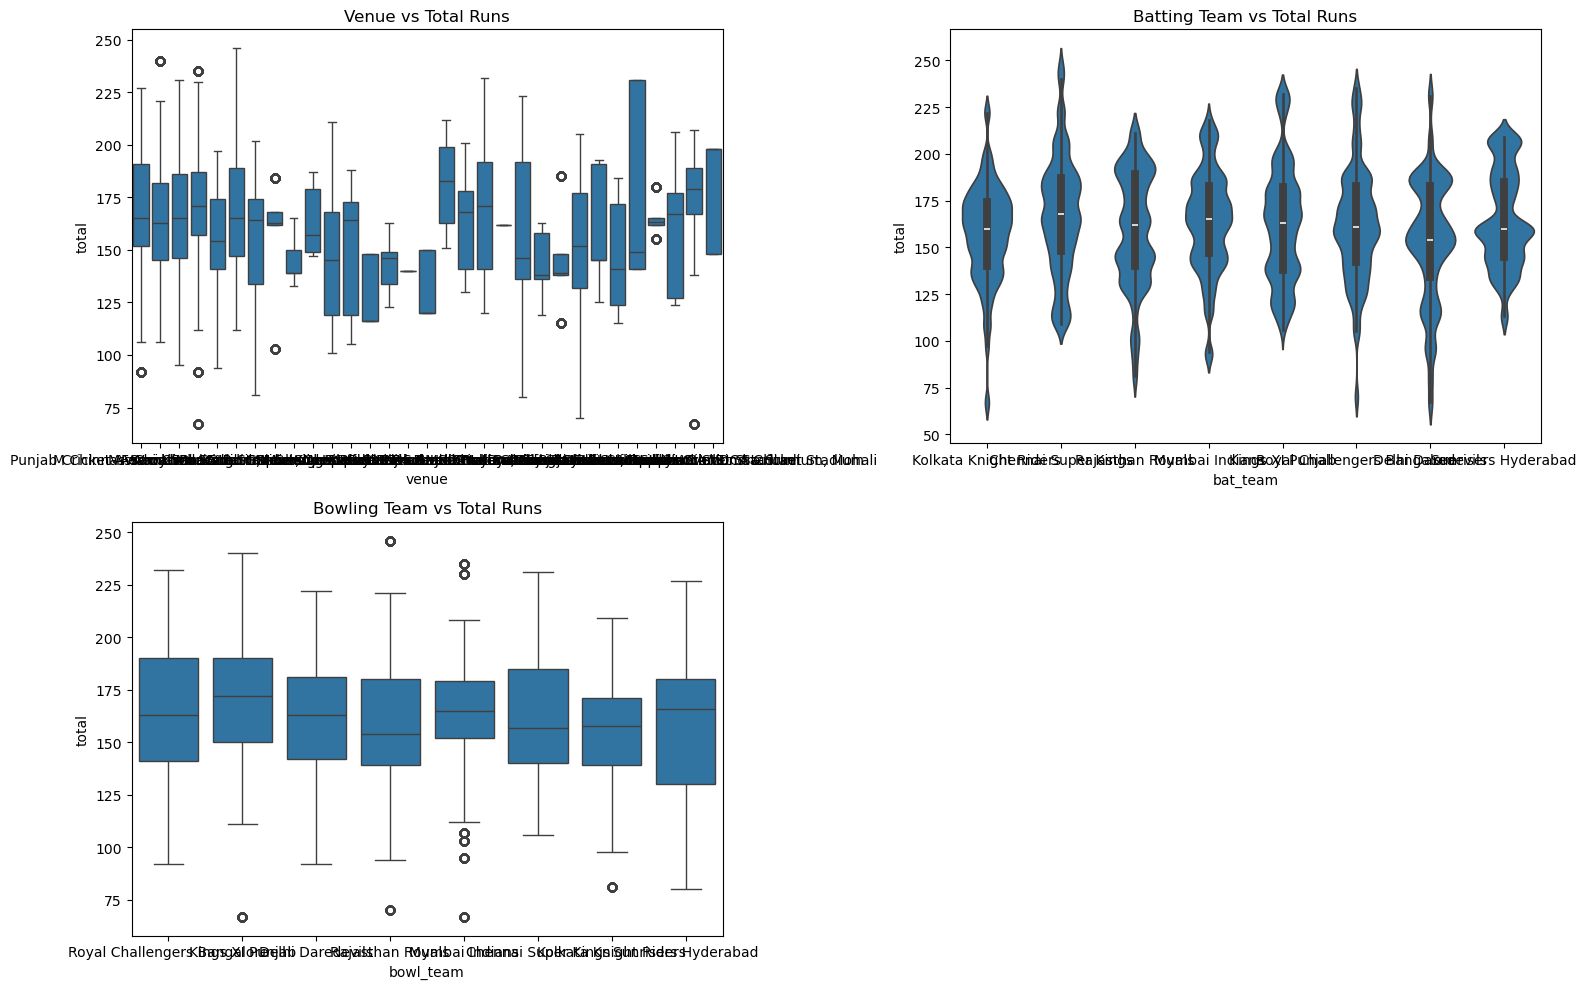

In [20]:
# Box Plots and Violin Plots
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='venue', y='total', data=data)
plt.title('Venue vs Total Runs')

plt.subplot(2, 2, 2)
sns.violinplot(x='bat_team', y='total', data=data)
plt.title('Batting Team vs Total Runs')

plt.subplot(2, 2, 3)
sns.boxplot(x='bowl_team', y='total', data=data)
plt.title('Bowling Team vs Total Runs')

plt.tight_layout()

Checking outliers

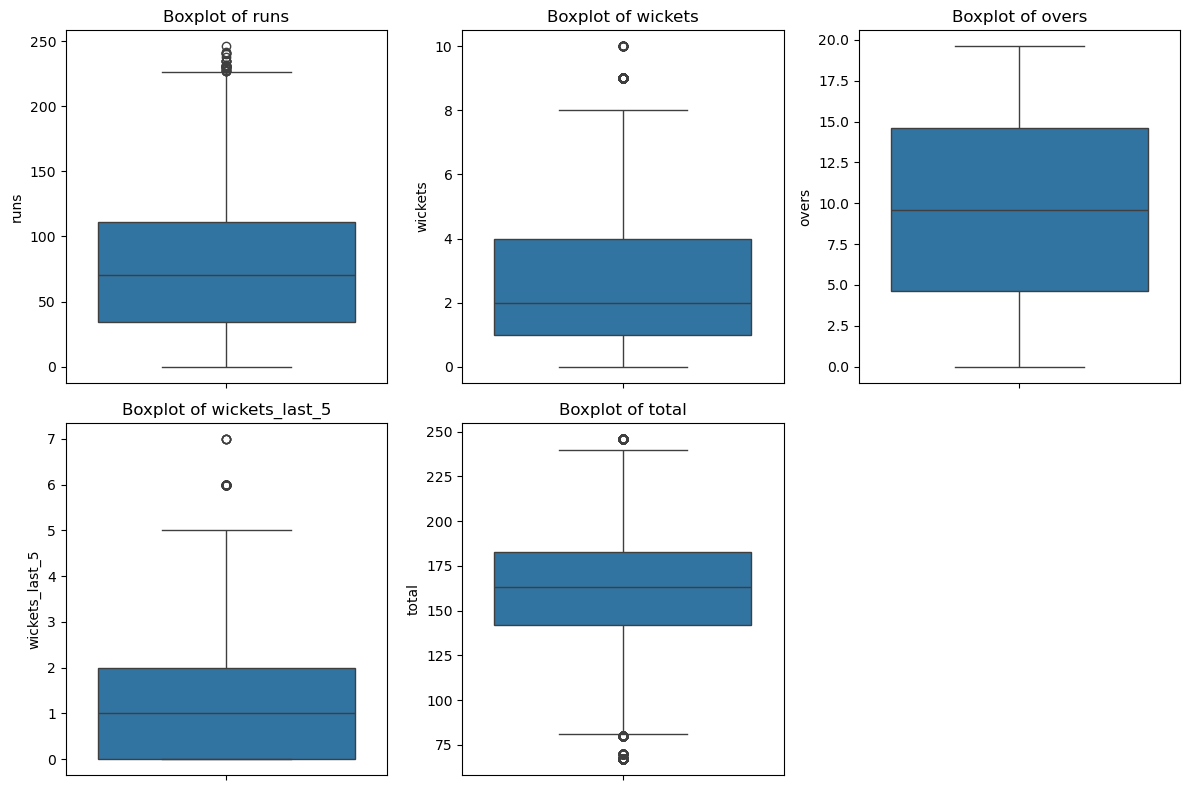

In [21]:
# Visualizing outliers using Boxplot
columns_to_check = ['runs', 'wickets', 'overs', 'wickets_last_5', 'total']

plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_check):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Removing outliers

In [22]:
# List of columns to check for outliers
columns_to_check = ['runs', 'wickets', 'overs', 'wickets_last_5', 'total']

#Checking and Removing Outliers using IQR

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = data[columns_to_check].quantile(0.25)
Q3 = data[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria for each column
outlier_condition = ((data[columns_to_check] < (Q1 - 1.5 * IQR)) | (data[columns_to_check] > (Q3 + 1.5 * IQR)))

# Show rows where any of the columns have outliers
outliers = data[outlier_condition.any(axis=1)]
print("Outliers detected (using IQR method):")
print(outliers)

# Remove outliers from the data
# Cleaned DataFrame
data_cleaned_iqr = data[~outlier_condition.any(axis=1)]

Outliers detected (using IQR method):
                                            venue               bat_team  \
243    Punjab Cricket Association Stadium, Mohali    Chennai Super Kings   
244    Punjab Cricket Association Stadium, Mohali    Chennai Super Kings   
245    Punjab Cricket Association Stadium, Mohali    Chennai Super Kings   
246    Punjab Cricket Association Stadium, Mohali    Chennai Super Kings   
247    Punjab Cricket Association Stadium, Mohali    Chennai Super Kings   
...                                           ...                    ...   
75884                       M Chinnaswamy Stadium  Kolkata Knight Riders   
75885                       M Chinnaswamy Stadium  Kolkata Knight Riders   
75886                       M Chinnaswamy Stadium  Kolkata Knight Riders   
75887                       M Chinnaswamy Stadium  Kolkata Knight Riders   
75888                       M Chinnaswamy Stadium  Kolkata Knight Riders   

             bowl_team  runs  wickets  overs  run

In [23]:
# Add a "home/away" feature
def assign_home_venue(row):
    home_venues = {
        "Kolkata Knight Riders": "Eden Gardens",
        "Mumbai Indians": "Wankhede Stadium",
        "Chennai Super Kings": "M. A. Chidambaram Stadium",
        "Royal Challengers Bangalore": "M. Chinnaswamy Stadium",
        "Delhi Capitals": "Arun Jaitley Stadium",
        "Sunrisers Hyderabad": "Rajiv Gandhi International Stadium",
        "Rajasthan Royals": "Sawai Mansingh Stadium",
        "Punjab Kings": "Punjab Cricket Association IS Bindra Stadium"
    }
    if row['bat_team'] in home_venues and row['venue'] == home_venues[row['bat_team']]:
        return 'home'
    else:
        return 'away'

# Apply the home/away feature
data_cleaned_iqr['venue_status'] = data_cleaned_iqr.apply(assign_home_venue, axis=1)

C:\Users\akhta\AppData\Local\Temp\ipykernel_21968\2494481918.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned_iqr['venue_status'] = data_cleaned_iqr.apply(assign_home_venue, axis=1)


# Encoding Categorical Data

In [24]:
# Encode categorical variables
categorical_columns = ['bat_team', 'bowl_team', 'venue', 'venue_status']
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_data = encoder.fit_transform(data_cleaned_iqr[categorical_columns])

# Split X and Y

In [25]:
# Create the final DataFrame
numerical_columns = ['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']
X = np.hstack((categorical_data, data_cleaned_iqr[numerical_columns].values))
y = data_cleaned_iqr['total']

In [26]:
# Keeping the track of model
models = dict()

# Model Training

In [27]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [29]:
#Predicting
y_pred_lr = model_lr.predict(X_test)

In [30]:
#Evaluating the model Linear Regression on performances metrices
print('---- Linear Regression - Model Evaluation ----')
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('R2 Score:', r2_score(y_test, y_pred_lr))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_lr))

---- Linear Regression - Model Evaluation ----
MSE: 381.74206284959695
R2 Score: 0.543290455234158
Mean Absolute Error: 14.656485072088083


In [31]:
from sklearn.model_selection import cross_val_score, KFold

# Setting up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using k-fold cross-validation
mse_scores = cross_val_score(model_lr, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model_lr, X, y, cv=kf, scoring='r2')
mae_scores = cross_val_score(model_lr, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert the negative MSE and MAE scores to positive values
mse_scores = -mse_scores
mae_scores = -mae_scores

print('---- Linear Regression - K-Fold Cross-Validation ----')
print('MSE Scores:', mse_scores)
print('Mean MSE:', mse_scores.mean())
print('R2 Scores:', r2_scores)
print('Mean R2 Score:', r2_scores.mean())
print('MAE Scores:', mae_scores)
print('Mean MAE:', mae_scores.mean())


---- Linear Regression - K-Fold Cross-Validation ----
MSE Scores: [381.74206285 381.27420923 383.42713934 374.61174051 382.6430706 ]
Mean MSE: 380.7396445075374
R2 Scores: [0.54329046 0.53444052 0.53136757 0.53714763 0.53406657]
Mean R2 Score: 0.5360625497948391
MAE Scores: [14.65648507 14.59764957 14.68300302 14.48488865 14.58142505]
Mean MAE: 14.600690272483812


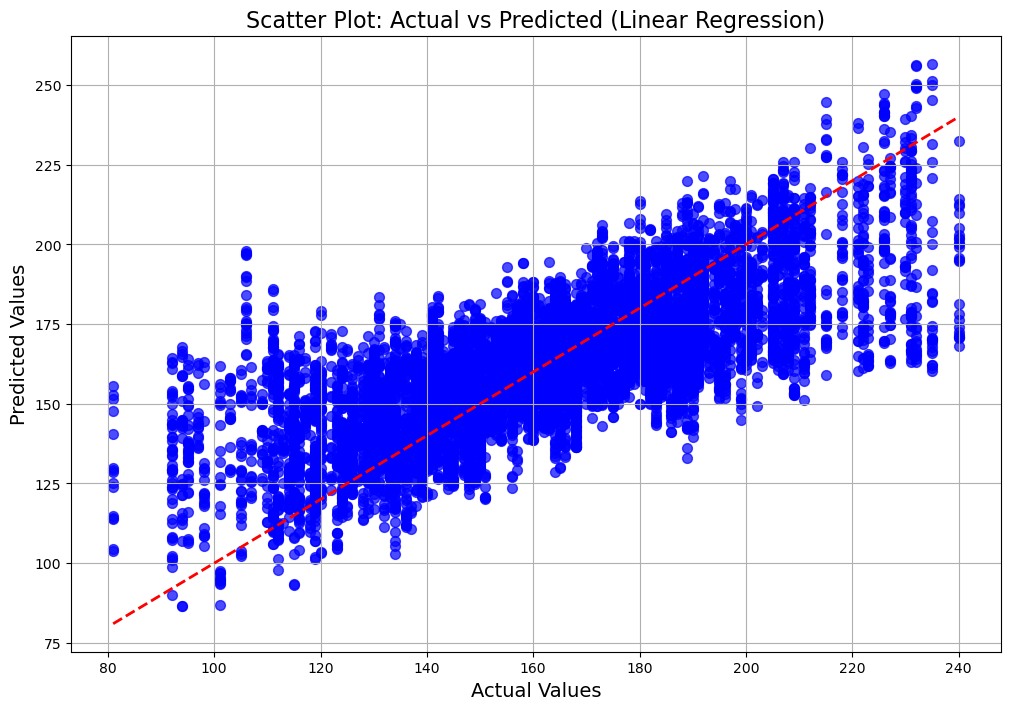

In [32]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(12, 8))  
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', s=50)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  
plt.title("Scatter Plot: Actual vs Predicted (Linear Regression)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(True)
plt.show()

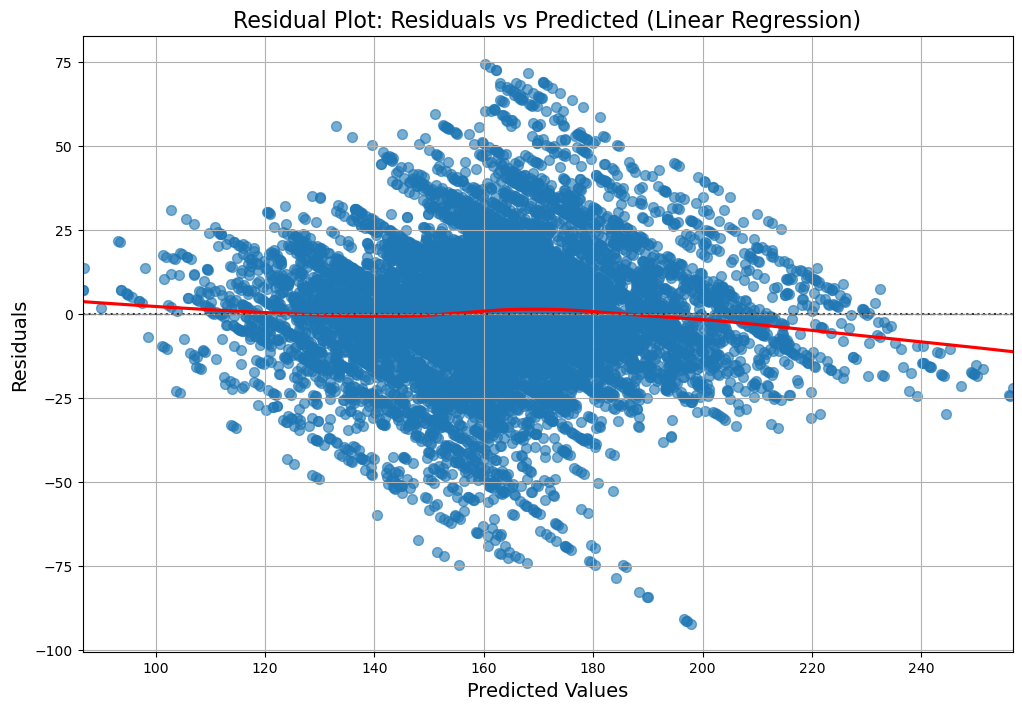

In [33]:
# Residual Plot: Residuals vs Predicted
residuals = y_test - y_pred_lr
plt.figure(figsize=(12, 8))  
sns.residplot(x=y_pred_lr, y=residuals, lowess=True, 
              line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6, 's': 50})  
plt.title("Residual Plot: Residuals vs Predicted (Linear Regression)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

In [34]:
#Random Forest Model
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
#Predicting
y_pred_rf = model_rf.predict(X_test)    

In [36]:
#Evaluating the model Random Forest of performance metrices
print('---- Random Forest Regression - Model Evaluation ----')
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_rf))

---- Random Forest Regression - Model Evaluation ----
MSE: 78.11382756028206
R2 Score: 0.9065459793488105
Mean Absolute Error: 4.397786401235985


In [37]:
# Setting up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest Model
model_rf = RandomForestRegressor()

# Evaluate the model using k-fold cross-validation
mse_scores_rf = cross_val_score(model_rf, X, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores_rf = cross_val_score(model_rf, X, y, cv=kf, scoring='r2')
mae_scores_rf = cross_val_score(model_rf, X, y, cv=kf, scoring='neg_mean_absolute_error')

# Convert the negative MSE and MAE scores to positive values
mse_scores_rf = -mse_scores_rf
mae_scores_rf = -mae_scores_rf

print('---- Random Forest Regression - K-Fold Cross-Validation ----')
print('MSE Scores:', mse_scores_rf)
print('Mean MSE:', mse_scores_rf.mean())
print('R2 Scores:', r2_scores_rf)
print('Mean R2 Score:', r2_scores_rf.mean())
print('MAE Scores:', mae_scores_rf)
print('Mean MAE:', mae_scores_rf.mean())

---- Random Forest Regression - K-Fold Cross-Validation ----
MSE Scores: [77.75596444 79.56000728 81.6486911  79.67655428 73.95868496]
Mean MSE: 78.51998041196035
R2 Scores: [0.90742134 0.90247992 0.90163267 0.90033566 0.90974976]
Mean R2 Score: 0.9043238698605256
MAE Scores: [4.35224285 4.50864465 4.41371765 4.36646452 4.32556514]
Mean MAE: 4.393326961854996


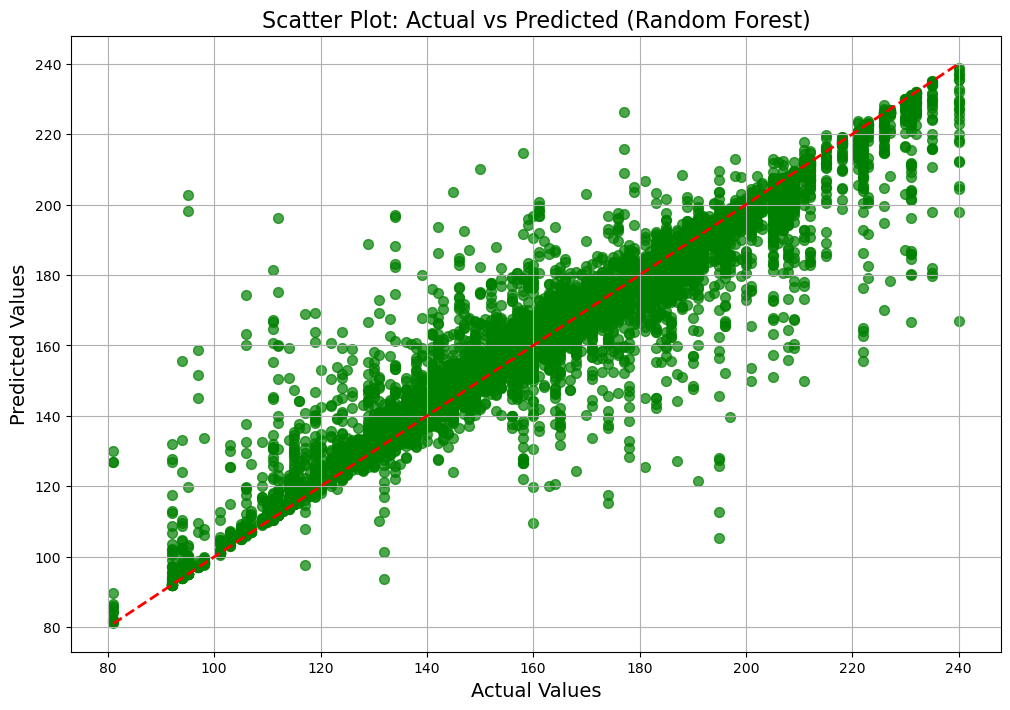

In [38]:
# Scatter Plot: Actual vs Predicted for Random Forest
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green', s=50) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Scatter Plot: Actual vs Predicted (Random Forest)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(True)
plt.show()

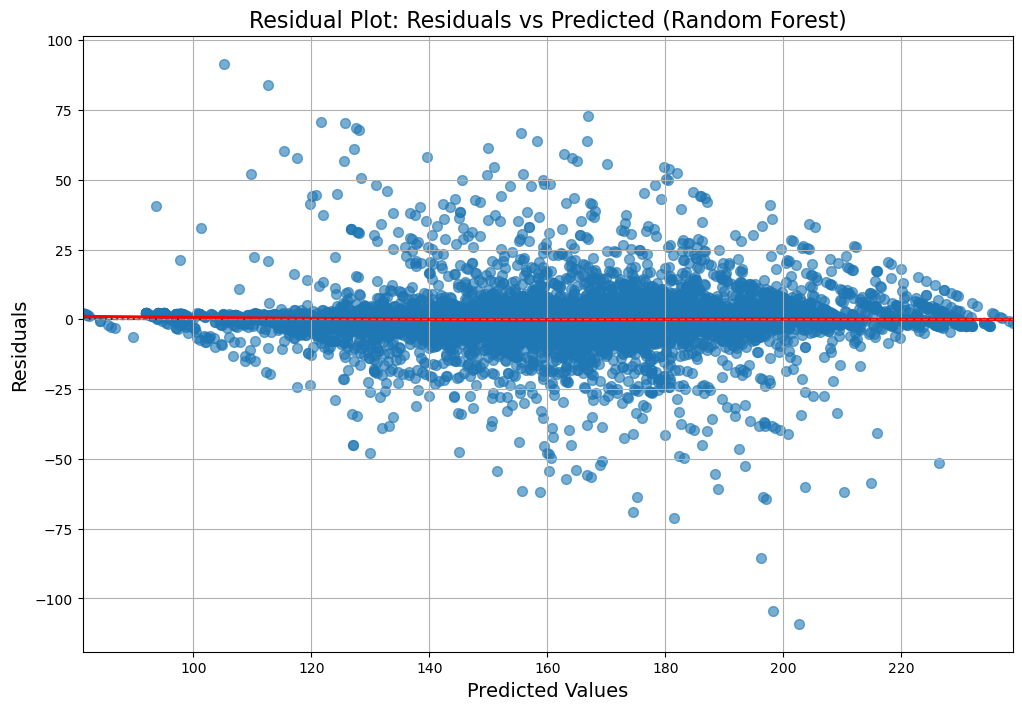

In [39]:
# Residual Plot: Residuals vs Predicted for Random Forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(12, 8)) 
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, 
              line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6, 's': 50})  
plt.title("Residual Plot: Residuals vs Predicted (Random Forest)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [41]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Train the SVR model
model_svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
model_svr.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [43]:
# Predicting
y_pred_svr = model_svr.predict(X_test_scaled)

In [44]:
#Evaluating the model SVR of performance metrices
print('---- SVR - Model Evaluation ----')
print('MSE:', mean_squared_error(y_test, y_pred_svr))
print('R2 Score:', r2_score(y_test, y_pred_svr))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_svr))

---- SVR - Model Evaluation ----
MSE: 103.21089811880837
R2 Score: 0.8765202819337035
Mean Absolute Error: 4.213380250696848


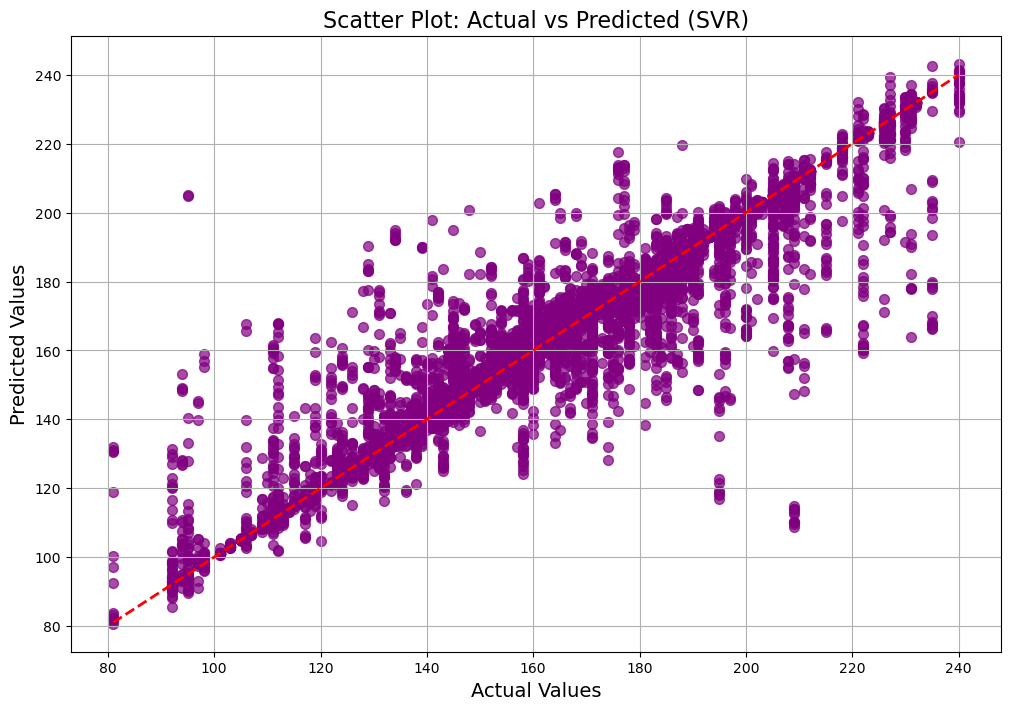

In [45]:
# Scatter Plot: Actual vs Predicted for SVR
plt.figure(figsize=(12, 8))  
plt.scatter(y_test, y_pred_svr, alpha=0.7, color='purple', s=50)  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Scatter Plot: Actual vs Predicted (SVR)", fontsize=16)
plt.xlabel("Actual Values", fontsize=14)
plt.ylabel("Predicted Values", fontsize=14)
plt.grid(True)
plt.show()

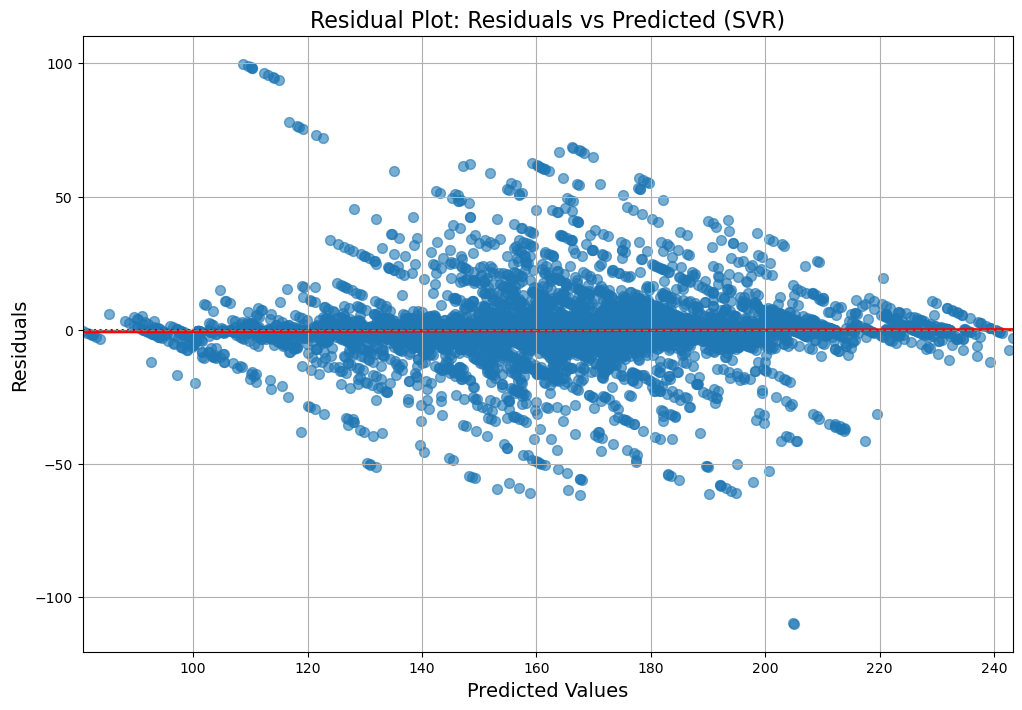

In [46]:
# Residual Plot: Residuals vs Predicted for SVR
residuals_svr = y_test - y_pred_svr
plt.figure(figsize=(12, 8))  
sns.residplot(x=y_pred_svr, y=residuals_svr, lowess=True, 
              line_kws={'color': 'red'}, scatter_kws={'alpha': 0.6, 's': 50})  
plt.title("Residual Plot: Residuals vs Predicted (SVR)", fontsize=16)
plt.xlabel("Predicted Values", fontsize=14)
plt.ylabel("Residuals", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True)
plt.show()

In [47]:
# Evaluation function
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae}, MSE: {mse}, R²: {r2}")

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svr, "SVM")

Linear Regression - MAE: 14.656485072088083, MSE: 381.74206284959695, R²: 0.543290455234158
Random Forest - MAE: 4.397786401235985, MSE: 78.11382756028206, R²: 0.9065459793488105
SVM - MAE: 4.213380250696848, MSE: 103.21089811880837, R²: 0.8765202819337035


C:\Users\akhta\AppData\Local\Temp\ipykernel_21968\1747501698.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot(x=model_names, y=accuracy, palette=colors)


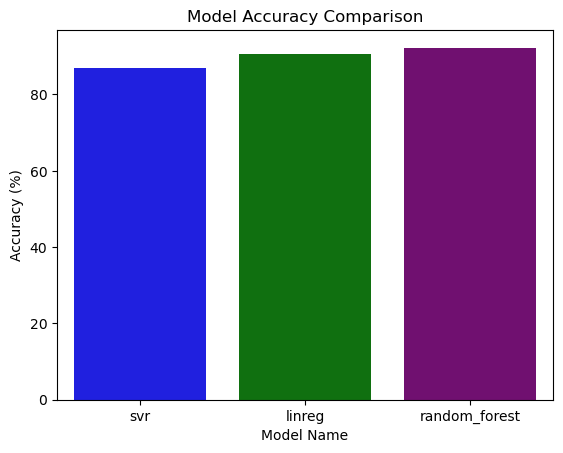

In [48]:
# Assuming 'models' is a dictionary like {'model_name': 'score'}
models = {
    "svr": "87.0",
    "linreg": "90.5",
    "random_forest": "92.3",
}

# Convert the dictionary to a list of model names and accuracies
model_names = list(models.keys())
accuracy = list(map(float, models.values()))

# Define custom colors for each model
colors = ['blue', 'green','purple']  # You can replace these with any valid color names or hex codes

# Create the bar plot with custom colors
barplot(x=model_names, y=accuracy, palette=colors)

# Display the plot with labels and title
plt.xlabel('Model Name')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.show()


In [49]:
def predict_score(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=model_rf):
  prediction_array = []
  # Batting Team
  if batting_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif batting_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif batting_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif batting_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif batting_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif batting_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif batting_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif batting_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'Chennai Super Kings':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0]
  elif bowling_team == 'Delhi Daredevils':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0]
  elif bowling_team == 'Kings XI Punjab':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0]
  elif bowling_team == 'Kolkata Knight Riders':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0]
  elif bowling_team == 'Mumbai Indians':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0]
  elif bowling_team == 'Rajasthan Royals':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0]
  elif bowling_team == 'Royal Challengers Bangalore':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0]
  elif bowling_team == 'Sunrisers Hyderabad':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

In [50]:
# Fit the OneHotEncoder during training
categorical_columns = ['bat_team', 'bowl_team', 'venue', 'venue_status']
encoder = OneHotEncoder()

# Fit the encoder on the training data
encoder.fit(data_cleaned_iqr[categorical_columns])

# Save the encoder for future use
joblib.dump(encoder, 'encoder.pkl')

# Train the model (example using RandomForestRegressor)
X = np.hstack((encoder.transform(data_cleaned_iqr[categorical_columns]).toarray(),
               data_cleaned_iqr[['runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5']].values))
y = data_cleaned_iqr['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Save the trained model
joblib.dump(model_rf, 'model_rf.pkl')

# Prediction Function
def predict_score(batting_team, bowling_team, overs, runs, wickets, runs_last_5, wickets_last_5):
    # Load the fitted encoder and model
    encoder = joblib.load('encoder.pkl')
    model_rf = joblib.load('model_rf.pkl')

    # Prepare the input data
    categorical_data = encoder.transform([[batting_team, bowling_team, 'Eden Gardens', 'home']])
    numerical_data = np.array([[runs, wickets, overs, runs_last_5, wickets_last_5]])
    input_data = np.hstack((categorical_data.toarray(), numerical_data))

    # Predict using the model
    pred = model_rf.predict(input_data)
    return int(round(pred[0]))

# Example usage
batting_team = "Kolkata Knight Riders"
bowling_team = "Chennai Super Kings"
score = predict_score(batting_team, bowling_team, overs=18.0, runs=150, wickets=4, runs_last_5=57, wickets_last_5=1)
print(f'Predicted Score: {score}','Actucal Score: 172')


Predicted Score: 173 Actucal Score: 172


c:\Users\akhta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
